# Census Data

### Importing Spark Libraries, Visualization Libraries, Pandas-Numpy (Data Manipualtion) Libraries

In [106]:
# Import Spark Session
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

# Import Spark Essential Functionalities 
from pyspark.sql import functions as func
from pyspark.sql.functions import rank, sum, col
from pyspark.sql import Window
from pyspark.mllib.stat import Statistics

In [107]:
# Import Visualization Libraries
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# Import Pandas, NumPy Libraries
import pandas as pd
import numpy as np

In [109]:
# Start Spark Connection
spark = SparkSession.builder.appName("aly6110project").getOrCreate()

# <center>----------------------- Data Set #1 -----------------------

In [110]:
# Load data
path = '/Users/HarshitGaur/Documents/Northeastern University/MPS Analytics/ALY 6110/Project/Dataset/Census Data/Census.csv'
pysparkDf = spark.read.csv(path, header = True)


### To check the schema of data

In [111]:
pysparkDf.printSchema()

root
 |-- age: string (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: string (nullable = true)
 |-- education: string (nullable = true)
 |-- education-num: string (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital-gain: string (nullable = true)
 |-- capital-loss: string (nullable = true)
 |-- hours-per-week: string (nullable = true)
 |-- country: string (nullable = true)
 |-- Income: string (nullable = true)



### Checking the first few records of Census data.

In [112]:
pysparkDf.show(6)

+---+-----------------+------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+-------------+------+
|age|        workclass|fnlwgt| education|education-num|     marital-status|        occupation|  relationship|  race|    sex|capital-gain|capital-loss|hours-per-week|      country|Income|
+---+-----------------+------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+-------------+------+
| 39|        State-gov| 77516| Bachelors|           13|      Never-married|      Adm-clerical| Not-in-family| White|   Male|        2174|           0|            40|United-States| <=50K|
| 50| Self-emp-not-inc| 83311| Bachelors|           13| Married-civ-spouse|   Exec-managerial|       Husband| White|   Male|           0|           0|            13|United-States| <=50K|
| 38|          Private|215646|   HS-grad|            9|          

### Get Total Count of Records in the data set.

In [113]:
pysparkDf.count()

32561

### Get Statistical Properties of Attributes of the Data.

In [114]:
pysparkDf.describe(["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]).show()

+-------+------------------+-----------------+------------------+----------------+------------------+
|summary|               age|    education-num|      capital-gain|    capital-loss|    hours-per-week|
+-------+------------------+-----------------+------------------+----------------+------------------+
|  count|             32561|            32561|             32561|           32561|             32561|
|   mean| 38.58164675532078| 10.0806793403151|1077.6488437087312| 87.303829734959|40.437455852092995|
| stddev|13.640432553581356|2.572720332067397| 7385.292084840354|402.960218649002|12.347428681731838|
|    min|                17|                1|                 0|               0|                 1|
|    max|                90|                9|             99999|             974|                99|
+-------+------------------+-----------------+------------------+----------------+------------------+



### To check for missing values in the data

In [115]:
from pyspark.sql.functions import isnan, when, count, col

pysparkDf.select([count(when(isnan(c), c)).alias(c) for c in pysparkDf.columns]).show()

+---+---------+------+---------+-------------+--------------+----------+------------+----+---+------------+------------+--------------+-------+------+
|age|workclass|fnlwgt|education|education-num|marital-status|occupation|relationship|race|sex|capital-gain|capital-loss|hours-per-week|country|Income|
+---+---------+------+---------+-------------+--------------+----------+------------+----+---+------------+------------+--------------+-------+------+
|  0|        0|     0|        0|            0|             0|         0|           0|   0|  0|           0|           0|             0|      0|     0|
+---+---------+------+---------+-------------+--------------+----------+------------+----+---+------------+------------+--------------+-------+------+



### To check whether data has NULL values in it?

In [116]:
for col in pysparkDf.columns:
    print(col, " - ", pysparkDf.filter(pysparkDf[col].isNull()).count())

age  -  0
workclass  -  0
fnlwgt  -  0
education  -  0
education-num  -  0
marital-status  -  0
occupation  -  0
relationship  -  0
race  -  0
sex  -  0
capital-gain  -  0
capital-loss  -  0
hours-per-week  -  0
country  -  0
Income  -  0


### To check whether data has '?' values in it?

In [117]:
for col in pysparkDf.columns:
    print(col, " - ", pysparkDf.filter(pysparkDf[col] == " ?").count())

age  -  0
workclass  -  1836
fnlwgt  -  0
education  -  0
education-num  -  0
marital-status  -  0
occupation  -  1843
relationship  -  0
race  -  0
sex  -  0
capital-gain  -  0
capital-loss  -  0
hours-per-week  -  0
country  -  0
Income  -  0


### Correlation Matrix

In [118]:
corr_data = pysparkDf.select('age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week')

col_names = corr_data.columns
features = corr_data.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

print(corr_df.to_string())

                     age  education-num  capital-gain  capital-loss  hours-per-week
age             1.000000       0.036527      0.077674      0.057775        0.068756
education-num   0.036527       1.000000      0.122630      0.079923        0.148123
capital-gain    0.077674       0.122630      1.000000     -0.031615        0.078409
capital-loss    0.057775       0.079923     -0.031615      1.000000        0.054256
hours-per-week  0.068756       0.148123      0.078409      0.054256        1.000000


### Correlation Plot (Heat Map)

In [119]:
corr_df.style.background_gradient(cmap='Blues')

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.036527,0.077674,0.057775,0.068756
education-num,0.036527,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,0.148123,0.078409,0.054256,1.000000


### Histogram to show the distribution of 'Age' of the Census Data.

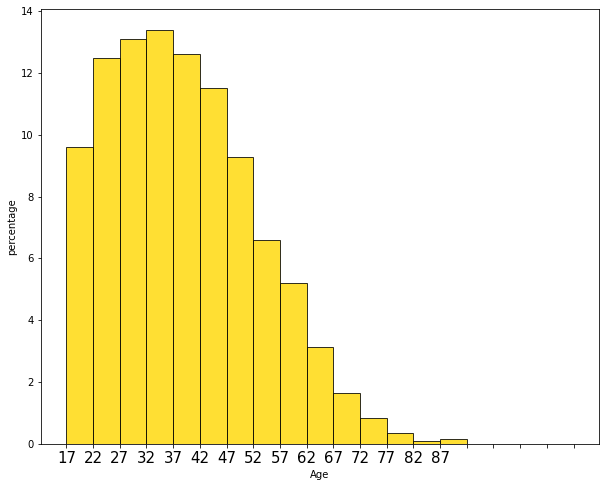

In [141]:
x = pysparkDf.select('age').toPandas().sort_values(by='age')
bins = np.arange(0, 100, 5.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='gold',
         ec='black',weights=np.zeros_like(x) + 100. / x.size)

plt.xlabel('Age')
plt.ylabel('percentage')
plt.xticks(bins, size=15)
plt.show()

# fig.savefig(var+".pdf", bbox_inches='tight')

### Bar Plot for 'Education Type' of the Census Data

In [121]:
education_bar = pysparkDf.select(['education']).\
   groupBy('education').\
   agg(func.count('Education').alias('Education_values')).toPandas()

education_bar.head()

,education,Education_values
0,Prof-school,576
1,10th,933
2,7th-8th,646
3,5th-6th,333
4,Assoc-acdm,1067


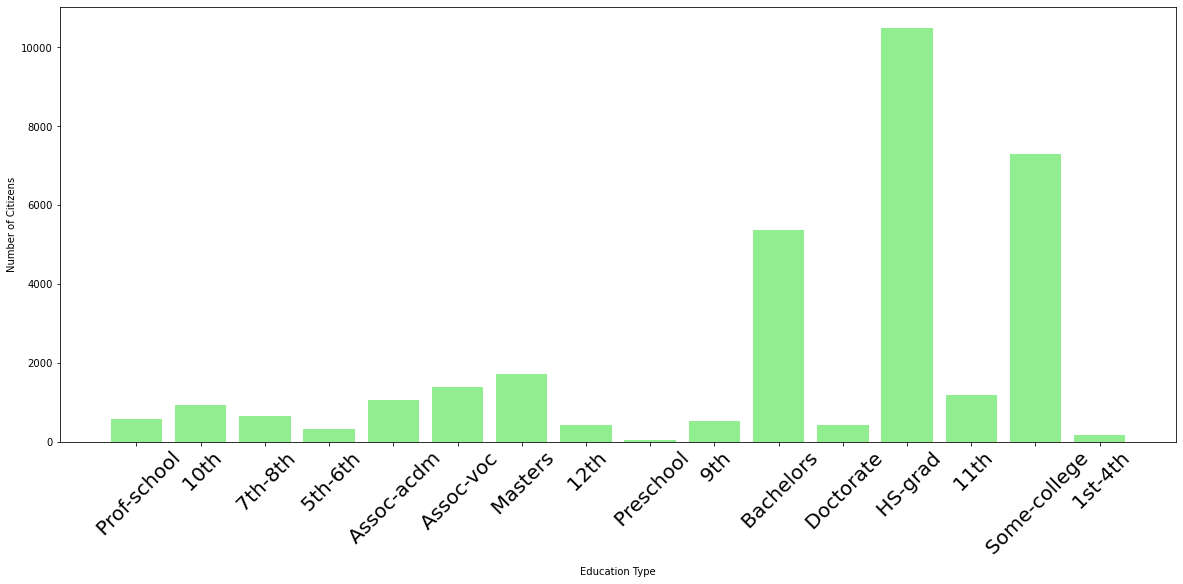

In [122]:
labels = education_bar['education']
# .select('education').toPandas()
values = education_bar['Education_values']
# .select('Education_values').toPandas()
ind = [x for x, _ in enumerate(labels)]

plt.figure(figsize=(20,8))
plt.bar(ind, values, width=0.8, color='lightgreen')

plt.xticks(ind, labels, rotation=45, size=20)
plt.xlabel("Education Type")
plt.ylabel("Number of Citizens")

plt.show()

# <center>----------------------- Data Set #2 -----------------------

In [123]:
# Load data
path = '/Users/HarshitGaur/Documents/Northeastern University/MPS Analytics/ALY 6110/Project/Dataset/CarDekho Sales.csv'
pysparkDf_two = spark.read.csv(path, header=True)


### To check the schema of data

In [124]:
pysparkDf_two.printSchema()

root
 |-- name: string (nullable = true)
 |-- year: string (nullable = true)
 |-- selling_price: string (nullable = true)
 |-- km_driven: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- seller_type: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- owner: string (nullable = true)
 |-- mileage: string (nullable = true)
 |-- engine: string (nullable = true)
 |-- max_power: string (nullable = true)
 |-- torque: string (nullable = true)
 |-- seats: string (nullable = true)



### Checking the first few records of Census data.

In [125]:
pysparkDf_two.show(6)

+--------------------+----+-------------+---------+------+-----------+------------+------------+----------+-------+----------+--------------------+-----+
|                name|year|selling_price|km_driven|  fuel|seller_type|transmission|       owner|   mileage| engine| max_power|              torque|seats|
+--------------------+----+-------------+---------+------+-----------+------------+------------+----------+-------+----------+--------------------+-----+
|Maruti Swift Dzir...|2014|       450000|   145500|Diesel| Individual|      Manual| First Owner| 23.4 kmpl|1248 CC|    74 bhp|      190Nm@ 2000rpm|    5|
|Skoda Rapid 1.5 T...|2014|       370000|   120000|Diesel| Individual|      Manual|Second Owner|21.14 kmpl|1498 CC|103.52 bhp| 250Nm@ 1500-2500rpm|    5|
|Honda City 2017-2...|2006|       158000|   140000|Petrol| Individual|      Manual| Third Owner| 17.7 kmpl|1497 CC|    78 bhp|12.7@ 2,700(kgm@ ...|    5|
|Hyundai i20 Sport...|2010|       225000|   127000|Diesel| Individual|      

### Get Total Count of Records in the data set.

In [126]:
pysparkDf_two.count()

8128

### Get Statistical Properties of Attributes of the Data.

In [127]:
pysparkDf_two.describe(["year", "selling_price", "km_driven", "seats"]).show()

+-------+------------------+-----------------+------------------+----------------+
|summary|              year|    selling_price|         km_driven|           seats|
+-------+------------------+-----------------+------------------+----------------+
|  count|              8128|             8128|              8128|            7907|
|   mean|2013.8040108267717|638271.8077017716| 69819.51082677166|5.41671936259011|
| stddev| 4.044248753683651|806253.4035082327|56550.554958219276|0.95958752023399|
|    min|              1983|           100000|                 1|              10|
|    max|              2020|           999000|             99500|               9|
+-------+------------------+-----------------+------------------+----------------+



### To check for missing values in the data

In [128]:
from pyspark.sql.functions import isnan, when, count, col

pysparkDf_two.select([count(when(isnan(c), c)).alias(c) for c in pysparkDf_two.columns]).show()

+----+----+-------------+---------+----+-----------+------------+-----+-------+------+---------+------+-----+
|name|year|selling_price|km_driven|fuel|seller_type|transmission|owner|mileage|engine|max_power|torque|seats|
+----+----+-------------+---------+----+-----------+------------+-----+-------+------+---------+------+-----+
|   0|   0|            0|        0|   0|          0|           0|    0|      0|     0|        0|     0|    0|
+----+----+-------------+---------+----+-----------+------------+-----+-------+------+---------+------+-----+



### To check whether data has NULL values in it?

In [129]:
for col in pysparkDf_two.columns:
    print(col, " - ", pysparkDf_two.filter(pysparkDf_two[col].isNull()).count())

name  -  0
year  -  0
selling_price  -  0
km_driven  -  0
fuel  -  0
seller_type  -  0
transmission  -  0
owner  -  0
mileage  -  221
engine  -  221
max_power  -  215
torque  -  222
seats  -  221


### Correlation Matrix

In [130]:
corr_data = pysparkDf_two.select("year", "selling_price", "km_driven", "seats")

col_names = corr_data.columns
features = corr_data.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

print(corr_df.to_string())

                   year  selling_price  km_driven  seats
year           1.000000       0.414092  -0.418006    NaN
selling_price  0.414092       1.000000  -0.225534    NaN
km_driven     -0.418006      -0.225534   1.000000    NaN
seats               NaN            NaN        NaN    1.0


### Correlation Plot (Heat Map)

In [131]:
corr_df.style.background_gradient(cmap='Reds')

,year,selling_price,km_driven,seats
year,1.000000,0.414092,-0.418006,nan
selling_price,0.414092,1.000000,-0.225534,nan
km_driven,-0.418006,-0.225534,1.000000,nan
seats,nan,nan,nan,1.000000


In [132]:
pysparkDf_two.select('year').toPandas().sort_values(by='year')

,year
316,1983
5322,1991
1432,1994
1474,1994
4712,1994
...,...
7589,2020
7586,2020
3218,2020
106,2020


### Histogram to show the distribution of 'Seats' of the CarDekho Sales' Data.

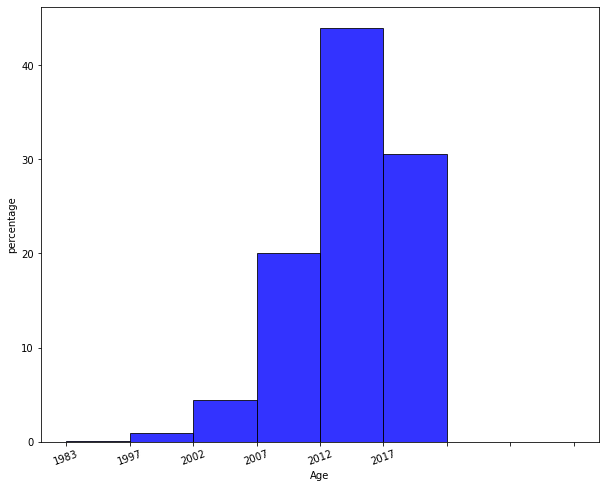

In [133]:
x = pysparkDf_two.select('year').toPandas().sort_values(by='year')
bins = np.arange(0, 45, 5.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='blue',
         ec='black',weights=np.zeros_like(x) + 100. / x.size)

plt.xlabel('Age')
plt.ylabel('percentage')
plt.xticks(bins, size=10, rotation=20)
plt.show()

# fig.savefig(var+".pdf", bbox_inches='tight')

# <center>----------------------- Data Sets JOIN -----------------------

In [136]:
# Load data
path = '/Users/HarshitGaur/Documents/Northeastern University/MPS Analytics/ALY 6110/Project/Dataset/Countries-Continents.csv'
pysparkDf_three = spark.read.csv(path, header=True)


### Showcasing the Countries - Continents Matching

In [137]:
pysparkDf_three.show(5)

+---------+--------+
|Continent| Country|
+---------+--------+
|   Africa| Algeria|
|   Africa|  Angola|
|   Africa|   Benin|
|   Africa|Botswana|
|   Africa| Burkina|
+---------+--------+
only showing top 5 rows



## INNER JOIN the 1st dataset (Census Data) and 3rd dataset (Countries-Continents Data)

In [138]:
pysparkDf.join(pysparkDf_three, pysparkDf_three.Country ==  pysparkDf.country, "inner") \
     .show(100)

+---+-----------------+------+-------------+-------------+--------------------+------------------+---------------+-------------------+-------+------------+------------+--------------+-------------+------+-------------+-------------+
|age|        workclass|fnlwgt|    education|education-num|      marital-status|        occupation|   relationship|               race|    sex|capital-gain|capital-loss|hours-per-week|      country|Income|    Continent|      Country|
+---+-----------------+------+-------------+-------------+--------------------+------------------+---------------+-------------------+-------+------------+------------+--------------+-------------+------+-------------+-------------+
| 39|        State-gov| 77516|    Bachelors|           13|       Never-married|      Adm-clerical|  Not-in-family|              White|   Male|        2174|           0|            40|United-States| <=50K|North America|United-States|
| 50| Self-emp-not-inc| 83311|    Bachelors|           13|  Married-